In [5]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta :
        return 0
    elif tmp > theta :
        return 1

In [6]:
AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

In [9]:
## 가중치와 편향으로 표현한 함수

import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0
    else:
        return 1

In [10]:
AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

In [13]:
## NAND 게이트

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0
    else:
        return 1

In [14]:
NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1)

(1, 1, 1, 0)

In [15]:
## OR 게이트

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2

    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0
    else:
        return 1

In [16]:
OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1)

(0, 1, 1, 1)

In [17]:
## 퍼셉트론의 한계
### XOR은??

def XOR (x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    
    return y

In [18]:
XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1)

(0, 1, 1, 0)

In [19]:
## 선형을 비선형으로 변형시키기 위해 활성화 함수를 적용해준다
## 활성화 함수는 각 Layer마다 적용된다.
## 대표적으로 활성화 함수는 시그모이드 함수와 LeRU 함수가 있다.

# 시그모이드 함수

def sigmoid(x):
    return 1/(1+np.exp(-x))

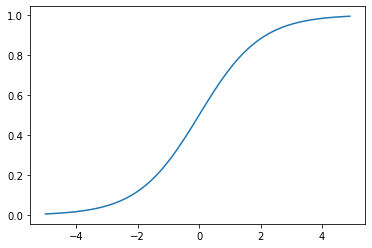

In [21]:
# 그려서 시그모이드 함수를 확인해보자

import matplotlib.pyplot as plt

x = np.arange(-5., 5., 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [36]:
# ReLU 함수

def ReLU(x):
    return np.maximum(0, x)

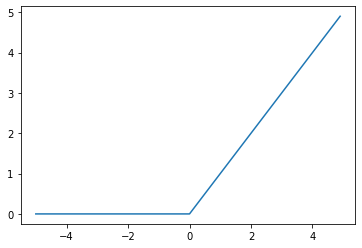

In [37]:
# 그려서 ReLU 함수를 확인해보자

import matplotlib.pyplot as plt

x = np.arange(-5., 5., 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.show()

# MNIST에 적용해보기!!

In [38]:
import pandas as pd

df_train = pd.read_csv('./data/mnist_train.csv')
df_test = pd.read_csv('./data/mnist_test.csv')

df_train.shape, df_test.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


((60000, 785), (10000, 785))

In [39]:
## 데이터를 Numpy로 바꿔보자

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

In [40]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [41]:
img = X_train[0]
label = y_train[0]

img = img.reshape(28, 28)

img_show(img)

In [42]:
## 미리 학습된 가중치를 읽어보자
## 이후에 학습하는 법을 배울 예정입니다!!

import pickle


def init_network():
    with open('./data/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [44]:
## 모델을 구현해보자!!

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(a3)
    
    return y

In [52]:
## Accuracy 확인

network = init_network()
accuracy__cnt = 0

for i in range(len(X_train)):
    y_pred = predict(network, X_train[i])
    p = np.argmax(y_pred)
    if p == y_train[i]:
        accuracy__cnt +=1
        
print("Accuracy : " + str(round(float(accuracy__cnt) / len(X_train)* 100, 2)) + "%")

<ipython-input-19-67c200cd16f1>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Accuracy : 92.52%


In [53]:
## 배치사이즈를 설정하는 코드
## 배치 사이즈 중에서는 가장 유명한 코드이다.

batch_size = 100
accuracy__cnt = 0

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = predict(network, X_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy__cnt += np.sum(p==y_train[i:i+batch_size])
    
print("Accuracy : " + str(round(float(accuracy__cnt) / len(X_train)* 100, 2)) + "%")

<ipython-input-19-67c200cd16f1>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Accuracy : 92.52%
